In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import matplotlib as mpl
import itertools
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
chr_start=97
plt.rcParams["figure.figsize"] = (7,5)
import matplotlib as mpl


#TO make times new roman
# rc_fonts={
#     "text.usetex": True,
#     'mathtext.default': 'regular',
#     'text.latex.preamble': [r'\usepackage{amsmath,amssymb,bm,fontenc,physics,lmodern,nicefrac}'],
#     "font.family": "serif",
#         "font.serif": "computer modern roman"
#          }
# mpl.rcParams.update(rc_fonts)


In [2]:
#how to generalize the XOR gate
def xorGate(inputs):
    global xor_index
    p_xor=p_xor_arr[xor_index]
#     p_xor=.999 #for validating the algorithm
    xor_index+=1
#     p_xor=np.random.normal(.5,.5*.341/np.sqrt(2))
#     if p_xor>1:
#         p_xor=2-p_xor
#     if p_xor<0:
#         p_xor=np.absolute(p_xor)
    if np.sum(inputs)%2==0:
#         print("pxor0: ",[p_xor,1-p_xor])
        return [p_xor,1-p_xor]
    else:
#         print("pxor1: ",[p_xor,1-p_xor])
        return [1-p_xor,p_xor]

#computing the mutual information of the outcome with two events
#p is probability of proper outcome
#n is number of involved agents


def iterateMarginals(n,depth,pe_marg,index,tp):
    if depth<n-1:
        return np.array([iterateMarginals(n,depth+1,pmarg,np.append(index,i),tp)\
                for pmarg,i in zip(pe_marg,range(2))])
    else:
        if tp=="joint":
            return np.multiply(xorGate(index),pe_marg)
        if tp=="cond":
            return xorGate(index)

#Iterates a marginal to a certain depth, then multiplies the signal at that depth
def itMarg(oe,ee_post,N,depth):
    if N<depth:
        return [itMarg(e,ee_post,depth,N+1) for e in oe]
    else:
        return np.multiply(oe,ee_post)

In [3]:
x=[[nn-i for i in range(nn)] for nn in n ]

NameError: name 'n' is not defined

In [3]:
def genPXORarr(sz):
    return np.random.uniform(0.00001,.9999,size=2**sz)

In [43]:
def computeAltTotalInformation(g,N):
    PE=None
    info=[[] for i in range(N)]
    for i in range(500):
        p_xor_arr=genPXORarr(N)
        for j in range(N):
            n=2**(N-j)
            #Generates the agent event marginals. For simplicity they are (uniform and) identical

            ind_arr=np.linspace(0,len(p_xor_arr)-1,len(p_xor_arr),dtype=int)

            xor_bin = np.array([bin(i).count("1")%2 for i in ind_arr])
            nxor_bin=1-xor_bin

            xor_mask=np.array([xor_bin,nxor_bin])
            oce=np.absolute(np.subtract(xor_mask,p_xor_arr))
            pe=np.transpose([np.sum(oce,axis=1)/n])
            if j==0:
                PE=pe
            info[j].append(np.sum(np.multiply(oce,np.log(np.divide(oce,PE)))/n))
            p_xor_arr=(p_xor_arr[::2] + 1-p_xor_arr[1::2])/2
    return(np.mean(info,axis=1),np.std(info,axis=1))

# in this version of the system, the events are all conditionally independent
xor_index=0



def calcEmarg(p_xor_arr):
    ind_arr=np.linspace(0,len(p_xor_arr)-1,len(p_xor_arr),dtype=int)
    xor_sltr = np.array([bin(i).count("1")%2 for i in ind_arr])
    
    p_xor0=np.sum(np.absolute(np.subtract(xor_sltr,p_xor_arr)))/len(ind_arr)
    p_xor1=np.sum(np.absolute(np.subtract((1-xor_sltr),p_xor_arr)))/len(ind_arr)

    return p_xor0,p_xor1

def calcMarg(p_xor_arr):
    ind_arr=np.linspace(0,len(p_xor_arr)-1,len(p_xor_arr),dtype=int)
    xor_sltr = np.array([bin(i).count("1")%2 for i in ind_arr])
    
    p_xor0=np.absolute(np.subtract(xor_sltr,p_xor_arr))/len(ind_arr)
    p_xor1=np.absolute(np.subtract((1-xor_sltr),p_xor_arr))/len(ind_arr)

    return p_xor0,p_xor1

def powerset(s):
    x = len(s)
    masks = [1 << i for i in range(x)]
    for i in range(1 << x):
        yield [ss for mask, ss in zip(masks, s) if i & mask]
sset=list(powerset([0,1,2,3]))[1:-1]


def generateCoopPlot():
    nn=np.linspace(2,12,6,dtype=int)
    xdata=[]
    ydata=[]
    
    marg_e=[]
    pxorAR = []
    for n in nn:
        emar=[]
        pxo=[]
        samples=[]
        x=np.linspace(0,n,n)
        for ii in range(20):
            ssamples=[]
            for i in range(5):
                global p_xor_arr
                p_xor_arr=genPXORarr(n)
                pxo.append(p_xor_arr)
                emar.append(calcEmarg(p_xor_arr))
                ssamples.append(computeTotalInformation("XOR",n))
            samples.append(np.mean(ssamples,axis=0))
        
        marg_e.append(np.mean(emar,axis=0))
        print(n,marg_e)
        pxorAR.append(np.mean(pxo))
        cum_samples=np.cumsum(samples,axis=1)
        y=cum_samples
        mean_y=np.mean(y,axis=0)
        var_y=np.std(y,axis=0)

        #LOG
        #warnings.warn(Warning())
        error=.434*np.divide(var_y,mean_y)
#         plt.plot(x,np.log(mean_y),label=n)
        plt.errorbar(x,np.log(mean_y),label=n,yerr=(error))

        plt.fill_between(x, np.log(mean_y)-error, np.log(mean_y)+error, alpha=0.33)
        
        #FOR THEORY FITTING
        xdata.append(x)
        ydata.append(np.log(mean_y))
        
# #       LINEAR
#         error=var_y
#         plt.errorbar(x,mean_y,label=n,yerr=error)
# #         plt.ylim(top=1,bottom=0)
#         plt.fill_between(x, mean_y-error, mean_y+error, alpha=0.33)
#         plt.ylim(bottom=.3)
        
#         except:
#             print("error")
#             plt.plot(x,mean_y,label=n)
#         print(.434*np.divide(var_y,mean_y))
#         plt.plot(x,np.log([n*info[0] for i in info]),label=r'$\sum_i I(o|e_i)$')


    plt.legend(title="n",fontsize=12)
    plt.ylabel("Log total information",fontsize=16)
    plt.xlabel("Cooperants (k_g)",fontsize=16)
    plt.savefig("RXOR.pdf")
    plt.show()
#     print(info) 

    return xdata,ydata,marg_e,pxorAR

def calcMarg(p_xor_arr):
    ind_arr=np.linspace(0,len(p_xor_arr)-1,len(p_xor_arr),dtype=int)
    xor_sltr = np.array([bin(i).count("1")%2 for i in ind_arr])
    
    p_xor0=np.absolute(np.subtract(xor_sltr,p_xor_arr))
    p_xor1=np.absolute(np.subtract((1-xor_sltr),p_xor_arr))

    return [p_xor0,p_xor1]

def marginalizeXList(x_list,index):
    def list_slice(S, step):
        return np.transpose([S[i::step] for i in range(step)])
    
    new_x_list=np.zeros((2,int(len(x_list[0])/2)))
    for j in range(2):
        x=list_slice(x_list[j],2**index) #FLIP BECAUSE 0,2^0 at end of list
        new_x_list[j]=np.add(x[1::2],x[::2]).flatten()/2

    return new_x_list

def computeInformation(p_list):
    return np.mean(np.multiply(p,np.log(p)))

p_list=np.array([0.14728741, 0.72355019, 0.46451306, 0.70678105, 0.46583055, \
0.35943405, 0.97082988, 0.37095391, 0.87884519, 0.70941512, \
0.79726053, 0.63799689, 0.43272064, 0.22389835, 0.40441803, \
0.15949486])
# p_list=np.array([0.55, 0.45, 0.30, 0.35, 0.40, 0.60, 0.55, 0.55, \
#                  0.45, 0.55, 0.35, 0.30, 0.60, 0.40, 0.55, 0.55])
p_list=np.array([0.35, 0.65, 0.65, 0.35, 0.65, 0.35, 0.35, 0.65, \
                 0.65, 0.35, 0.35, 0.65, 0.35, 0.65, 0.65, 0.35])
# p_list=np.array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,  \
#                  0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3])
# m0=.5;m1=.6;m2=.65;m3=.65;m4=.9
# p_list=[m0,1-m1,1-m1,m2,1-m1,m2,m2,1-m3,1-m1,m2,m2,1-m3,m2,1-m3,1-m3,m4]
#     0000,0001,0010,0011,0100,0101,0110,0111,1000,1001,1010,1011,1100,1101,1110,1111


In [5]:
import matplotlib
# plt.rcParams["figure.figsize"] = (6,5)
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')

[0] 0.04570054152531278
[1] 0.04570054152531278
[0, 1] 0.04570054152531278
[2] 0.04570054152531278
[0, 2] 0.04570054152531278
[1, 2] 0.04570054152531278
[0, 1, 2] 0.04570054152531278
[3] 0.04570054152531278
[0, 3] 0.04570054152531278
[1, 3] 0.04570054152531278
[0, 1, 3] 0.04570054152531278
[2, 3] 0.04570054152531278
[0, 2, 3] 0.04570054152531278
[1, 2, 3] 0.04570054152531278


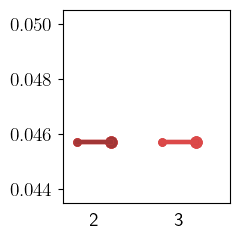

In [45]:
info=[]
p=calcMarg(p_list)
# print("PL:",p_list)
infod={}
for sl in sset:
    p_marg=p
    for s,i in zip(sl,range(len(sl))):
        s-=i
        p_marg=marginalizeXList(p_marg,s)
    ind_arr=np.linspace(0,len(p_marg[0])-1,len(p_marg[0]),dtype=int)
    xor_sltr = np.array([bin(i).count("1")%2 for i in ind_arr])
    p_marg=np.add(np.multiply(p_marg[0],1-xor_sltr),np.multiply(p_marg[1],xor_sltr))
    
    info.append(np.log(2)+np.mean(p_marg*np.log(p_marg))+np.mean((1-p_marg)*np.log(1-p_marg)))
    print(sl,info[-1])
    lbl=[x for x in [0,1,2,3] if x not in sl]
    infod[str(lbl)]=info[-1]
ssl=[len(ss) for ss in sset] 


plt.rcParams["figure.figsize"] = (2.5,2.5)
sigs=[a for a in sset if len(a)==1]
for (key,val),ss in zip(infod.items(),ssl):
    
    #Skipping λ=0
    if ss==3:
        continue
    #Storing the total information
    synVal=infod[key]
    
    #Subtracting the effect of each marginal value to get the synergy term
    for s in sigs:
        if str(s)[1] in key and not str(s) == key:
            infod[key]-=infod[str(s)]
    #Saving the number of signals
    signals=4-ss
    
    #Adjusting for plotting on x axis
    ss=ss*1.25
    
    #Generating rrandom colors
    r=np.random.uniform(.5, 1)
    
    #Printing the signals remaining and the information quantities
#     print(key[1:-1])
#     print("Total Info:",synVal,"; Synergy:",infod[key], "; Marginal Info:", synVal-infod[key])
    
    plt.plot([3.5-ss,4-ss],[(synVal-infod[key])/signals,synVal],color=(r,r/3,r/3),linewidth=3)
    plt.scatter(3.5-ss,(synVal-infod[key])/signals,marker='o',color=(r,r/3,r/3),s=25)
    plt.scatter(4-ss,synVal,marker='o',color=(r,r/3,r/3),s=60)
#     print(synVal-infod[key])
#     print(synVal)
#     if ss==0:
#         plt.text(4-ss-.7,synVal, key[1:-1],fontsize=13)
#     else:
#         plt.text(4-ss+.1,synVal, key[1:-1],fontsize=13)
locs, labels = plt.xticks()            # Get locations and labels
plt.xticks([0,1.25,2.5,3.75], [1,2,3,4],fontsize=14)  # Set locations and labels
plt.yticks(fontsize=14)
# plt.ylabel(r"$\textrm{Information}$ $(nats)$",fontsize=16)
# plt.xlabel("$\textrm{Cooperants}$ ($k$)",fontsize=16)
plt.scatter(-4,synVal,marker='o',label=r"$\textrm{Averaged}$",color=(1,1/3,1/3),s=25)
plt.scatter(-4,synVal,marker='o',label=r"$\textrm{Pooled}$",color=(1,1/3,1/3),s=60)
plt.xlim(left=.8,right=3.25)
plt.ylim(bottom=.0435,top=.0505)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
)
# plt.ylim(top=.0725,bottom=.063)
plt.tight_layout()
# plt.ylim(bottom=-.005,top=.145)
# plt.grid()
# plt.legend(fontsize=14)
# plt.savefig("BaseCase.pdf")
plt.savefig("NoSynergy.pdf")
# plt.savefig("SymmSynergy.pdf")

In [ ]:
n=np.linspace(2,14,7,dtype=int)
x=[[nn-i for i in range(nn)] for nn in n ]
y=[]
vy=[]
for nn in n:
    m,v = computeAltTotalInformation("XOR",nn)
    y.append(m)
    vy.append(v)
#     plt.plot(xx,np.subtract(np.log2(.28),np.multiply(xx,np.log2(np.e))))

In [ ]:
plt.rcParams["figure.figsize"] = (6,5)
plt.axhline(np.log(np.log(2)-1/2))
c={'[0.   0.25 0.25]': [0.  , 0, 0.0],'[0.  0.5 0.5]': [0. ,0, 0.2],'[0.   0.75 0.75]': [0.  , .07, 0.4],'[0. 1. 1.]': [0.,.14, .6],'[1. 1. 1.]': [0.,.21, .8]\
  ,'[1. 1. 2.]': [0.,.28, 1]}
for xx,yy,vv,cc in zip(x[:-1],y,vy,c.values()):
    plt.plot(xx,np.log(yy),linewidth=3,label=np.amax(xx),color=cc)
    error=.434*np.divide(vv,(yy*np.log(2)))
    plt.fill_between(xx, np.log(yy)-error, np.log(yy)+error, alpha=0.33,color=cc)
    plt.plot(np.subtract(np.amax(xx),xx)+1,np.log(np.log(2)-1/2)-np.subtract(xx,1)*np.log(2),color='gray',linestyle='dashed',alpha=1)
legend=plt.legend(title=r"Signals $l$",fontsize=12) 
plt.setp(legend.get_title(),fontsize='x-large')
rc_fonts={'text.latex.preamble': [r'\usepackage{amsmath,amssymb,bm,physics,lmodern}']}
plt.ylabel(r"Log$_2[I(E;\{S\}_l)]$",fontsize=16)
plt.xlabel(r"Cooperants $k$",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("RXOR.pdf")
plt.ylim(bottom=-11)
plt.xlim(right=11,left=.8)
plt.tight_layout()
plt.savefig("RXOR.pdf")


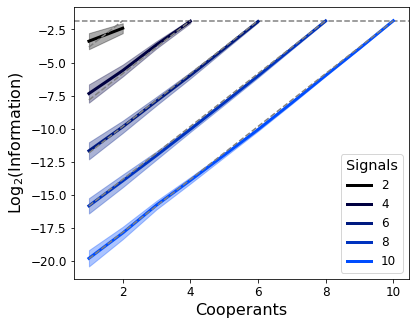

In [304]:
plt.rcParams["figure.figsize"] = (6,5)
plt.axhline(np.log2(.28),color='gray',linestyle='dashed',alpha=1)
c={'[0.   0.25 0.25]': [0.  , 0, 0.0],'[0.  0.5 0.5]': [0. ,0, 0.25],'[0.   0.75 0.75]': [0.  , .1, 0.5],'[0. 1. 1.]': [0.,.2, .75],'[1. 1. 1.]': [0.,.3, 1]}
for xx,yy,vv,cc in zip(x[:-1],y,vy,c.values()):
    plt.plot(xx,np.log2(yy),linewidth=3,label=np.amax(xx),color=cc)
    error=.434*np.divide(vv,(yy*np.log(2)))
    plt.fill_between(xx, np.log2(yy)-error, np.log2(yy)+error, alpha=0.33,color=cc)
    plt.plot(np.subtract(np.amax(xx),xx)+1,np.log2(.28)-np.multiply(2,xx)+2,color='gray',linestyle='dashed',alpha=1)
legend=plt.legend(title="Signals",fontsize=12)
plt.setp(legend.get_title(),fontsize='x-large')
plt.ylabel(r"Log$_2$(Information)",fontsize=16)
plt.xlabel("Cooperants",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("RXOR.pdf")
# plt.ylim(top)

[0] 0.06593194462450902
[1] 0.06593194462450902
[0, 1] 0.06593194462450902
[2] 0.06593194462450902
[0, 2] 0.06593194462450902
[1, 2] 0.06593194462450902
[0, 1, 2] 0.06593194462450902
[3] 0.06593194462450902
[0, 3] 0.06593194462450902
[1, 3] 0.06593194462450902
[0, 1, 3] 0.06593194462450902
[2, 3] 0.06593194462450902
[0, 2, 3] 0.06593194462450902
[1, 2, 3] 0.06593194462450902
1, 2, 3
Total Info: 0.06593194462450902 ; Synergy: -0.13186388924901804 ; Marginal Info: 0.19779583387352706
0, 2, 3
Total Info: 0.06593194462450902 ; Synergy: -0.13186388924901804 ; Marginal Info: 0.19779583387352706
2, 3
Total Info: 0.06593194462450902 ; Synergy: -0.06593194462450902 ; Marginal Info: 0.13186388924901804
0, 1, 3
Total Info: 0.06593194462450902 ; Synergy: -0.13186388924901804 ; Marginal Info: 0.19779583387352706
1, 3
Total Info: 0.06593194462450902 ; Synergy: -0.06593194462450902 ; Marginal Info: 0.13186388924901804
0, 3
Total Info: 0.06593194462450902 ; Synergy: -0.06593194462450902 ; Marginal Inf

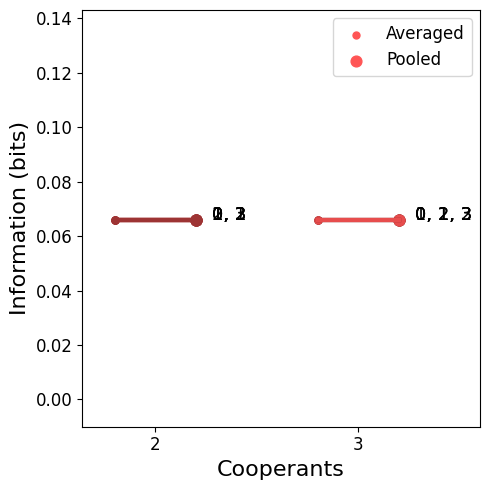

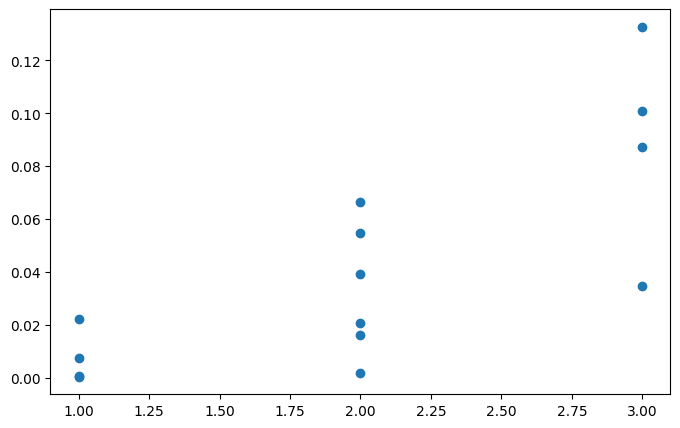

In [220]:
plt.scatter(np.subtract(4,ssl),info)

In [ ]:
for key

In [7]:
p_marg_e=.5

This function computes information quantities for a given XOR environment. Currently, it computes information via the equation

\begin{equation}
I(O;\{E_i\})=I(O;E_1)+I(O;E_2|E_1)+...+I(O;E_n|\{E_{i\neq n}\})
\end{equation}

This equation can be used for computing the information of the standard PXOR gate, as every agent experiences the same marginal probabilities $P(O|E_i)$. 
In the randomized PXOR (RPXOR), though, every agent sees a different conditional probability. 
While $I(O;\{E_i\})$ is constant over permutation of $\{E_i\}$, the each subset of the population contains a different amount of information, that is $I(O;E_1)\neq I(O;E_2)$.
This has two consequences.
First, we cannot simply calculate the information of a single agent as $I(O;E_i)$. 
Rather, we must compute $\langle I(O;E_i)\rangle=\frac 1n\sum_i^nI(O;E_i)$.
Second, we each agent has a calculable initial growth rate given the environment. 

The calculation of the above section must be redone to refine the figure demonstrating the interesting properties of the gate, and so that we can parametrically assign agents growth rate given the sampled state of the environment. 

## np.mean(1-xoa)

In [7]:
xoa=genPXORarr()
np.mean(xoa)

TypeError: genPXORarr() missing 1 required positional argument: 'sz'

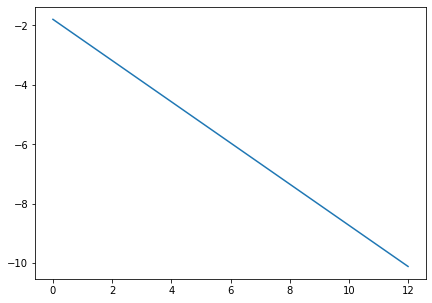

In [231]:
plt.plot(x,y)

In [43]:
m=np.mean(xoa)
(m*np.log(m))

-0.3462957299700197

In [14]:
xd1=[np.linspace(1,i,i) for i in range(2,17,2)]

In [15]:
xd1

[array([1., 2.]),
 array([1., 2., 3., 4.]),
 array([1., 2., 3., 4., 5., 6.]),
 array([1., 2., 3., 4., 5., 6., 7., 8.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16.])]

In [12]:
xoa=genPXORarr(16)
xoa

array([0.97194491, 0.68113699, 0.74768505, ..., 0.49404635, 0.46198838,
       0.43583312])

In [65]:
np.sum(xoa*np.log(np.divide(xoa,(1-xoa))))

32334.423334667583

In [60]:
(2**nnx)*np.mean(np.log(1-xoa))

array([-3.96862189e+00, -1.58744876e+01, -6.34979503e+01, -2.53991801e+02,
       -1.01596720e+03, -4.06386882e+03, -1.62554753e+04])

In [66]:
np.sum(np.log(1-xoa))

-65021.901111390565

In [18]:
np.mean(np.log(1-xoa))+np.sum(np.log(xoa*np.divide(xoa,(1-xoa))))+np.log(2)

array([-65668.51444891, -65680.51843085, -65728.53435861, -65920.59806964,
       -66688.85291375, -69761.87229019, -82053.94979597])

In [25]:
j1=np.mean(np.log2(1-xoa))
j2=np.mean((xoa)*np.log2(np.divide(xoa,(1-xoa))))
j3=np.log2(2)

/var/folders/f3/7npqvhls75s3wz_ddb_zvd7w0000gr/T/ipykernel_4946/895864806.py:10: RuntimeWarning: invalid value encountered in log
  y=np.log(bar)


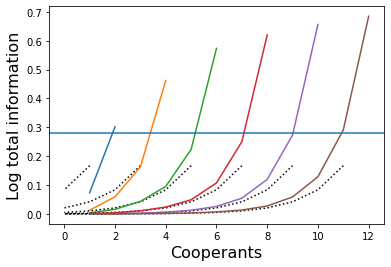

In [26]:
n=16
x=np.linspace(0,16,17)
nnx=np.linspace(2,14,7,dtype=int)
bar=np.mean(np.log(np.divide(xoa,(1-xoa))))\
     +2**nnx*np.mean(np.log(1-xoa))\
     +np.log(2)

barDyn=np.var(xoa)/(2**(x-1))

y=np.log(bar)
yDyn=(barDyn)

for xdd,ydd,i in zip(xd1,yd,range(len(yd))):
    plt.plot(xdd[-1]-xdd,yDyn[:len(xdd)],color='k',linestyle='dotted')
    plt.plot(xdd,np.exp(ydd),label=2*i+2)

mnx=np.mean(xoa)
# plt.axhline(2*np.log(mnx*np.log(mnx)+np.log(2)),linestyle='dashed')
plt.axhline((j1+j2+j3))

# plt.legend(title="n",fontsize=12)
plt.ylabel("Log total information",fontsize=16)
plt.xlabel("Cooperants",fontsize=16)
plt.savefig("RXOR.pdf")
# plt.ylim(top=1,bottom=-2)


In [54]:
#UNIFORM 0-1 (mean .5)

#Generates a list of random integers to serve as conditional XOR probabilities
xd,yd,marge,pxorAR=generateCoopPlot()

Checking normalization...
marg s: 1.0
joint s: 1.0
cond e|s: 4.0
joint e,s: 1.0
transposed joint s: 1.0

REORDERED S [0, 1]
REORDERED E|S [0, 1, 2]
REORDERED E,S [0, 1, 2]
oce [0.4454828 0.5545172]
0.2481500429263362 0.5 0.44548280459780165

0.19733276167146543 0.5 0.44548280459780165

0.2518499570736638 0.5 0.5545171954021983

0.3026672383285346 0.5 0.5545171954021983

REORDERED S [1, 0]
REORDERED E|S [0, 2, 1]
REORDERED E,S [0, 2, 1]
oce [0.4454828 0.5545172]
0.2481500429263362 0.5 0.44548280459780165

0.19733276167146543 0.5 0.44548280459780165

0.2518499570736638 0.5 0.5545171954021983

0.3026672383285346 0.5 0.5545171954021983

REORDERED S [0, 1]
REORDERED E|S [0, 1, 2]
REORDERED E,S [0, 2, 1]
oce [[0.49630009 0.39466552]
 [0.50369991 0.60533448]]
[0.01274348 0.15123548] [0.25 0.25] [0.49630009 0.39466552]

[0.23540656 0.04609728] [0.25 0.25] [0.49630009 0.39466552]

[0.23725652 0.09876452] [0.25 0.25] [0.50369991 0.60533448]

[0.01459344 0.20390272] [0.25 0.25] [0.50369991 0.6053

KeyboardInterrupt: Interrupted by user

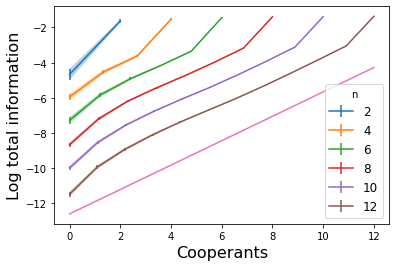

In [64]:
#UNIFORM .5-1 (mean .75)

#Generates a list of random integers to serve as conditional XOR probabilities
generateCoopPlot()

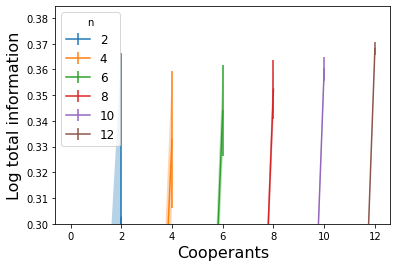

In [10]:
#Generates a list of random integers to serve as conditional XOR probabilities
generateCoopPlot()

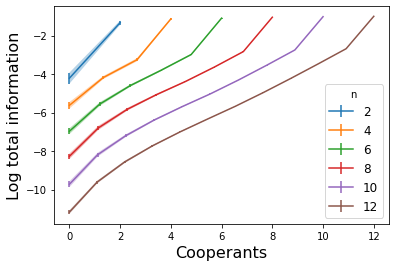

In [78]:
#Generates a list of random integers to serve as conditional XOR probabilities
# p_xor_arr=np.random.uniform(0.50001,.9999,size=int(2**16))
#
generateCoopPlot()

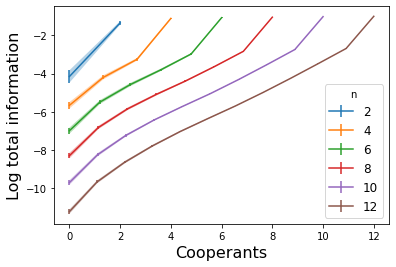

In [77]:
#Generates a list of random integers to serve as conditional XOR probabilities
# p_xor_arr=np.random.uniform(0.50001,.9999,size=int(2**16))
#
generateCoopPlot()

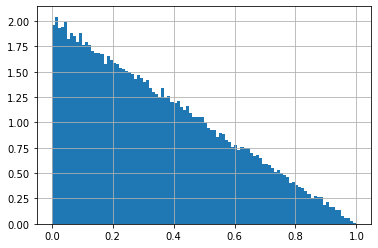

0.33304114992822353


In [15]:
nnn=100000
ar=np.zeros(nnn)
for i in range(nnn):
    ar[i]=np.absolute(np.random.uniform(0,1)-np.random.uniform(0,1))
b=plt.hist(ar,bins=100,density=True)
plt.grid()
plt.show()
print(np.mean(ar))

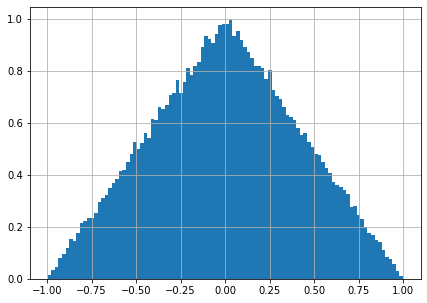

-0.0004072750789545679


In [2]:
nnn=100000
ar=np.zeros(nnn)
for i in range(nnn):
    ar[i]=np.random.uniform(0,1)-np.random.uniform(0,1)
b=plt.hist(ar,bins=100,density=True)
plt.grid()
plt.show()
print(np.mean(ar))

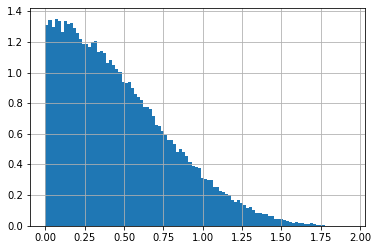

0.46654847159604534


In [12]:
nnn=100000
ar=np.zeros(nnn)
for i in range(nnn):
    ar[i]=np.absolute(np.random.uniform(0,1)-np.random.uniform(0,1)+np.random.uniform(0,1)-np.random.uniform(0,1))
b=plt.hist(ar,bins=100,density=True)
plt.grid()
plt.show()
print(np.mean(ar))

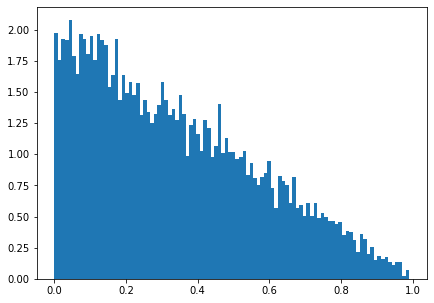

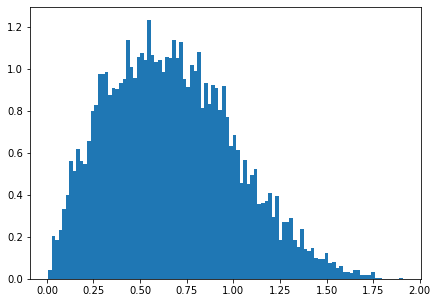

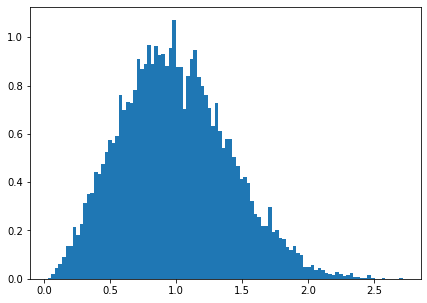

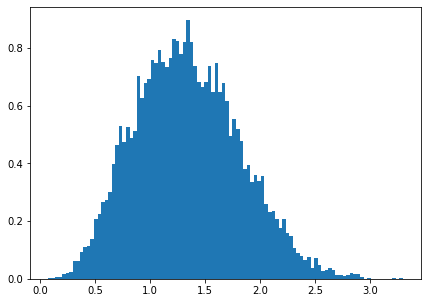

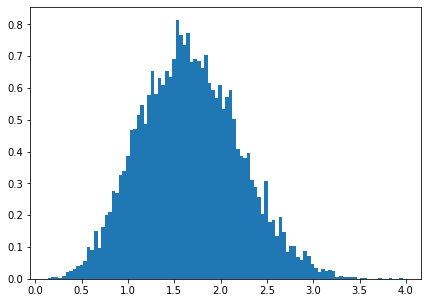

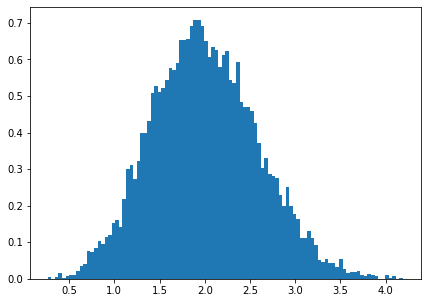

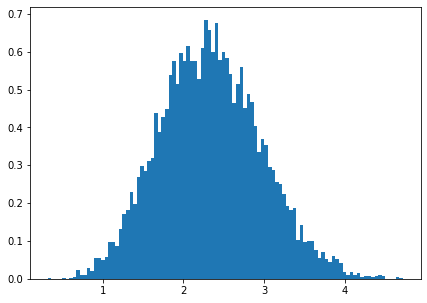

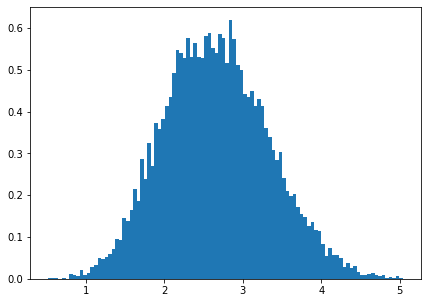

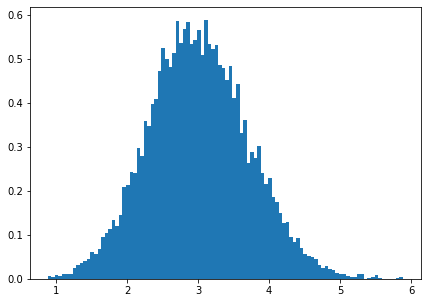

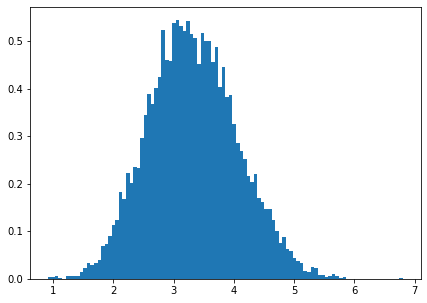

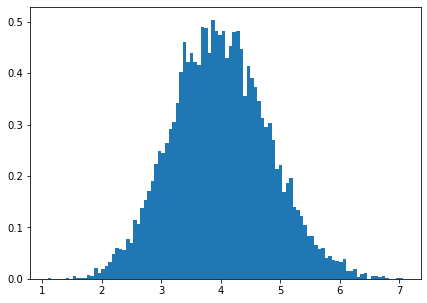

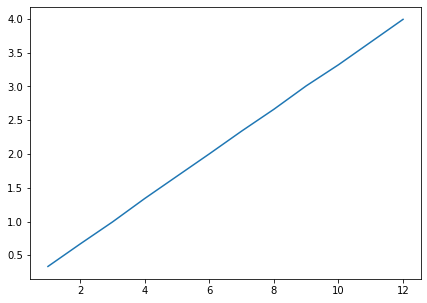

In [6]:
nnn=10000
aa=8
means=[]
x=np.linspace(1,12,11,dtype=int)
for aa in x:
    ar=np.zeros(nnn)
    for i in range(nnn):
        ar[i]=np.sum(np.absolute([(np.random.uniform(0,1)-np.random.uniform(0,1)) for i in range(aa)]))
    plt.hist(ar,bins=100,density=True)
    plt.show()
    means.append(np.mean(ar))
plt.plot(x,means)

In [238]:
#For manipulating the binary values of the tree and marginalizing p
ns=16
bin_sel={} #Selects which index a signal applies a p or q to
bin_arr =np.array([2**i for i in range(ns)])
listed_signals=[i for i in range(ns)]

In [242]:
xor_sltr

array([0, 1, 1, ..., 1, 1, 0])